In [1]:
from metabolism.MetabolicNetworks import GroupLevelNetwork
from metabolism.StabilityTester import StabilityTester

### metabolism.DcmWorker

In [1]:
from metabolism import DcmWorker

In [ ]:
dicomworker = DcmWorker(
    dicom_dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI/",
    nifti_dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/",
    bodyweight = "TBW",
    pipeline = ["PET","PETSUV"], # "CT","PET","DynamicPET","PETSUV"
)

### metabolism.Segmentor

In [3]:
from metabolism import Segmentor

In [ ]:
segmentor = Segmentor()
segmentor.load_model(modelname="mpum")
segmentor.inference_all(nifti_dataset="/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/",
                       targetpart="brain")

### metabolism.StabilityTester

In [2]:
from metabolism.StabilityTester import StabilityTester
stabilityTester = StabilityTester()

In [5]:
df = stabilityTester.analyze(
    dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
    modelname="mpum")

[➤] Load FEAT from : /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
[✅ SUCCESS] Feature has no NAN or INF
--------------------
[➤] Starting stability Test. Data Count:90
 [✅] resample size:10, correlation coefficient:0.5499800165248255
 [✅] resample size:11, correlation coefficient:0.5686381904872643
 [✅] resample size:12, correlation coefficient:0.6126950089085971
 [✅] resample size:13, correlation coefficient:0.6347787765593296
 [✅] resample size:14, correlation coefficient:0.6583418713660788
 [✅] resample size:15, correlation coefficient:0.6796170148054266
 [✅] resample size:16, correlation coefficient:0.7038209915907171
 [✅] resample size:17, correlation coefficient:0.7244485705126624
 [✅] resample size:18, correlation coefficient:0.7301801110025086
 [✅] resample size

- 有90个healthy样本稳定性测试，说明40个reference样本就可以达到0.9的相似性，因此40样本分为reference dataset，剩下50例分为control group

### metabolism.MetabolicNetworks.GroupLevelNetwork

In [1]:
from metabolism.MetabolicNetworks import GroupLevelNetwork
from metabolism.StabilityTester import StabilityTester

In [2]:
stabilityTester = StabilityTester()
groupLevelNetwork = GroupLevelNetwork()

In [3]:
stabilityTester.suvseg2feature(dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
                         modelname="mpum")
stabilityTester.suvseg2feature(dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/",
                         modelname="mpum")

[➤] Load SUV and SEG from : /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
--------------------
[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
--------------------
 [⏳] Processing: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#007_S_4516#TRANSAXIAL_BRAIN_3D_FDG_IR_CTAC_NF#2014-02-17_15_02_28.0#I414579.nii.gz
 [✅SUCCESS] roi features are written into: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#007_S_4516#TRANSAXIAL_BRAIN_3D_FDG_IR_CTAC_NF#2014-02-17_15_02_28.0#I414579/mpum#suvr.json
--------------------
 [⏳] Processing: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#072_S_4391#ADNI_BRAIN_FDG_1st_15min#2012-01-17_10_42_53.0#I278457.nii.gz
 [✅SUCCESS] roi features are written into: /share/home/yxchen/dataset/metabolism_dat

KeyboardInterrupt: 

In [4]:
grouplevelnet = groupLevelNetwork.process_pcorr_diffgroup(
    dataset1 = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
    dataset2 = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/",
    modelname="mpum")

[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[✅] dataset count:90
[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/
[✅] dataset count:44
--------------------
partial correlation !
--------------------
[➤] dataset1: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[✅] dataset1 count:90
[➤] dataset2: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/
[✅] dataset2 count:44
[✅] group-level metabolic network is returned !!


In [7]:
pcorrnet = groupLevelNetwork.dataset2pcorr(
    dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
    modelname="mpum")

[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[✅] dataset count:90


In [9]:
pearsonnet = groupLevelNetwork.dataset2pearson(
    dataset = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
    modelname="mpum")

[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[✅] dataset count:90


### metabolism.MetabolicNetworks.IndividualNetwork

In [6]:
from metabolism import IndividualNetwork
individualNetwork = IndividualNetwork(
    control = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
    dataset2 = "/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/",
    modelname="mpum")

In [7]:
control_zscores,df2_zscores,edge_significant_counts = individualNetwork.process(referencenumber=40)

[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
[➤] dataset1: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[✅] dataset1 count:90
[➤] dataset2: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/
[✅] dataset2 count:44
[✅SUCCESS] return dataset: control_zscores,df2_zscores,edge_significant_counts


In [12]:
df = individualNetwork.analyze_singleorgan()
df.head(2)

[➤] singleorgan analyze starting...
[✅SUCCESS] return dataframe: roi,patient_degree_max,patient_degree_mean,control_degree_max,control_degree_mean


,roi,patient_degree_max,patient_degree_mean,control_degree_max,control_degree_mean
32,R-Inferiolateral remainder of parietal lobe,625.952459,228.793855,219.133606,58.046605
30,R-Posterior temporal lobe,542.836482,220.321994,348.877389,71.598216


- df中分析了单个器官，节点度定义为每一个节点相邻边的z-score的绝对值的合，可以比较patient group和control group之间对于单个roi的代谢变化

In [13]:
df = individualNetwork.analyze_multiorgan()
df.head(2)

[➤] multiorgan analyze starting
[✅SUCCESS] return dataframe: SignificantCount,roi1,roi2,patient_z_mean,patient_z_std,control_z_mean,control_z_std


,SignificantCount,roi1,roi2,patient_z_mean,patient_z_std,control_z_mean,control_z_std
0,21,R-Inferiolateral remainder of parietal lobe,R-Parahippocampal-and-ambient-gyri,1.583052,5.401423,-0.088399,1.063179
1,19,R-Posterior temporal lobe,L-Cingulate gyrus gyrus cinguli posterior part,3.979276,4.925479,0.483443,1.953936


- df中记录了器官关联的z-score的差异，对于特定器官对，patient group的z-score和control group的z-score之间的差异；

### metabolism.MetabolicNetworks.KLNetwork

In [3]:
from metabolism import KLNetwork

In [4]:
kLNetwork_cn = KLNetwork(
    dataset="/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/",
    modelname="mpum"
)
kLNetwork_cn.process()

This method need one suv to create network !!
[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[❌] No segment result for Model mpum
    SUV path:/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/SUVTBW#098_S_4275#ADNI_BRAIN_3D__FDG#2014-01-23_10_33_54.0#I406309.nii.gz
 [✅ SKIP] Result has saved to: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#007_S_4516#TRANSAXIAL_BRAIN_3D_FDG_IR_CTAC_NF#2014-02-17_15_02_28.0#I414579/KLSE_matrix.npz
 [✅ SKIP] Result has saved to: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#072_S_4391#ADNI_BRAIN_FDG_1st_15min#2012-01-17_10_42_53.0#I278457/KLSE_matrix.npz
 [✅ SKIP] Result has saved to: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#027_S_0118#ADNI_Brain_PET__Raw_FDG#2011-10-11_11_39_15.0#I260663/KLSE_matrix.npz
 [✅ SKIP] Result has saved to: /share/home/yxchen/dataset/metabolism_dataset/ADNI_

In [5]:
klses_cn, roi_name = kLNetwork_cn.analyze()

[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/
[➤] Find 125 KLSE data !!
[✅] Effective Region Count: 81
 [✅]  Remove region: L-Substantia nigra, R-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#007_S_4516#TRANSAXIAL_BRAIN_3D_FDG_IR_CTAC_NF#2014-02-17_15_02_28.0#I414579/KLSE_matrix.npz
 [✅]  Remove region: L-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#072_S_4391#ADNI_BRAIN_FDG_1st_15min#2012-01-17_10_42_53.0#I278457/KLSE_matrix.npz
 [✅]  Remove region: L-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#023_S_1190#PET_Brain_fdg__FDG#2011-03-23_15_26_11.0#I224751/KLSE_matrix.npz
 [✅]  Remove region: R-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_CN/mpum#SUVTBW#023_S_4448#PET_Brain_FDG#2012-02-16_11_28_04.0#I285694/KLSE_matrix.npz
 [✅]  Remo

In [6]:
kLNetwork_ad = KLNetwork(
    dataset="/share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/",
    modelname="mpum"
)
# kLNetwork_ad.process()
klses_ad, roi_name = kLNetwork_ad.analyze()

This method need one suv to create network !!
[➤] dataset: /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/
[➤] Find 52 KLSE data !!
[✅] Effective Region Count: 81
 [✅]  Remove region: L-Substantia nigra, R-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/mpum#SUVTBW#023_S_5120#PET_Brain_FDG#2013-06-20_11_29_27.0#I377544/KLSE_matrix.npz
 [✅]  Remove region: L-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/mpum#SUVTBW#051_S_4980#3D_BRAIN_ADNI-2_ITERATIVE_FDG#2012-11-28_16_04_31.0#I348440/KLSE_matrix.npz
 [✅]  Remove region: L-Substantia nigra, R-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/mpum#SUVTBW#021_S_4718#3D_PET_BRAIN_ADNI-2_FDG_I#2012-05-29_11_24_00.0#I310447/KLSE_matrix.npz
 [✅]  Remove region: L-Substantia nigra from /share/home/yxchen/dataset/metabolism_dataset/ADNI_preprocess/ADNI_AD/mpum#SUVTBW#037_S_6377#6_fr_FDG_Brain

- KLNetwork.process() : 根据PET SUV和Seg分割掩膜来计算KL散度，过程涉及大量KDE运算，需要一点时间，运行一次结果会存储在本地；
- KLNetwork.analyze() : 读取存储在本地文件，每一个样本都会有一个KLSE矩阵，0表示相关性强，1表示相关性差

### metabolism.Analyzer

In [7]:
from metabolism import Analyzer
analyzer = Analyzer()

analyzer = Analyzer()
df = analyzer.intersubject_dissimilarity(klses_cn, roi_name)
df.head(2)

In [9]:
df = analyzer.intersubject_dissimilarity(klses_ad, roi_name)
df.head(2)

[➤] Dissimilarity -1 to 1.
[✅] df columns: roi, dissimilarity_mean, dissimilarity_std


,roi,dissimilarity_mean,dissimilarity_std
0,R-Hippocampus,-0.662777739398901,0.16785997908485284
1,L-Hippocampus,-0.6576449222236739,0.15442166552446346


- 上面反映了每一个group内的每一个roi之间的不相似性。假设某一个roi的dissimilarity较高，说明这个roi在这个group内个体之间的差异较大。

In [10]:
df = analyzer.roi_pair_compare(klses_cn,klses_ad, roi_name)
df[df.significant == True].head(2)

[➤] If roi-roi pair has significant difference between two groups.


,roi1,roi2,group1,group2,p,significant
14,R-Hippocampus,L-Fusiform gyrus,0.748199,0.536267,7.878830e-06,True
15,R-Hippocampus,R-Cerebellum,0.413587,0.195003,9.232969e-08,True


- 在两个groups，哪些roi-roi pair的代谢相关性发生了显著的变化。mannwhitneyu计算显著性并做了Bonferroni校正

### metabolism.Painter

In [8]:
import numpy as np
from metabolism import Painter
painter = Painter()

<Figure size 400x400 with 0 Axes>

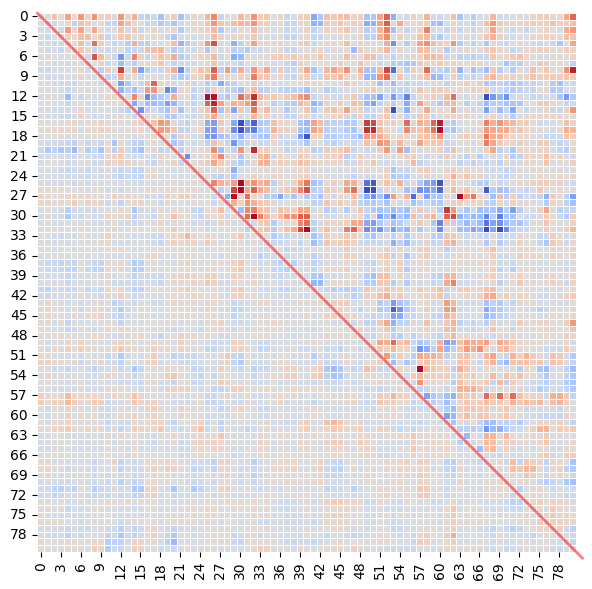

In [9]:
control_zscore = np.mean(control_zscores,axis=0)
df2_zscore = np.mean(df2_zscores,axis=0)
painter.hotmap_zscore2(control_zscore,df2_zscore)

- 上图比较了normal group和patient group的pcorr的z-score

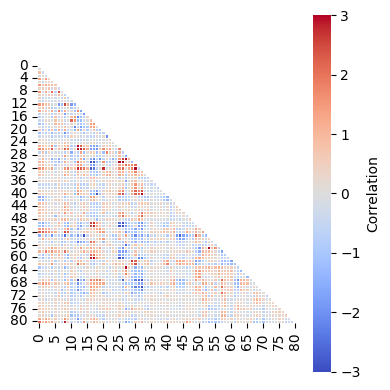

In [16]:
painter.hotmap_zscore(df2_zscore)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class Painter:
    def __init__(self):
        pass
    def hotmap_zscore(self,matrix):
        plt.figure(figsize=(4,4))
        mask = np.triu(np.ones_like(matrix,dtype=bool))
        sns.heatmap(
            matrix,
            annot=False,          # 在格子中显示数值
            fmt=".2f",           # 数值格式（保留两位小数）
            mask=mask,
            cmap='coolwarm',     # 颜色映射
            vmin=-3, vmax=3,     # 颜色范围
            square=True,         # 保持格子为正方形
            linewidths=0.5,      # 格子间线宽
            cbar=True,
            cbar_kws={'label': 'Correlation'}
        )
        plt.tight_layout()
        plt.show()
    def hotmap_zscore2(self,matrix1,matrix2,matrixtype):
        '''
            - matrixtype: "z-score" or "kldivergence"
        '''
        mask_lower = np.triu(np.ones_like(matrix1, dtype=bool), k=1)  # 隐藏上三角（含对角线）
        mask_upper = np.tril(np.ones_like(matrix2, dtype=bool), k=-1)  # 隐藏下三角（含对角线）
        fig, ax = plt.subplots(figsize=(5,4))
        if matrixtype == "z-score":
            vmin,vmax = -3,3
        elif matrixtype == "kldivergence":
            vmin,vmax = 0,1
        else:
            vmin,vmax = None,None
            print(f"matrixtype is wrong ! z-score or kldivergence !! ")
            # return None
        sns.heatmap(
            matrix1,
            mask=mask_lower,          # 隐藏上三角和对角线
            cmap='coolwarm',             # 下三角用蓝色系
            vmin=vmin, vmax=vmax,     # 颜色范围
            annot=False,
            fmt=".2f",
            square=True,
            linewidths=0.5,
            cbar=True,
            ax=ax
        )
        
        sns.heatmap(
            matrix2,
            mask=mask_upper,          # 隐藏下三角和对角线
            cmap='coolwarm',              # 上三角用红色系
            vmin=vmin, vmax=vmax,     # 颜色范围
            annot=False,
            fmt=".2f",
            square=True,
            linewidths=0.5,
            cbar=False,
            ax=ax
        )
        ax.plot(
            [matrix1.shape[0] + 1, 0],
            [matrix1.shape[0] + 1, 0],          # x从i到i+1
            color='red',         # 红色
            linewidth=2,         # 线宽
            transform=ax.transData,  # 使用数据坐标系
            clip_on=False,         # 避免边缘裁剪
            alpha=0.5
        )
        
        plt.tight_layout()
        plt.show()
    def hotmap_edge(self,matrix):
        plt.figure(figsize=(4,4))
        mask = np.triu(np.ones_like(matrix,dtype=bool))
        vmax = np.max(matrix)  # 获取数据最大值
        sns.heatmap(
            matrix,
            annot=False,          # 在格子中显示数值
            fmt=".2f",           # 数值格式（保留两位小数）
            mask=mask,
            cmap='coolwarm',     # 颜色映射
            square=True,         # 保持格子为正方形
            linewidths=0.5,      # 格子间线宽
            cbar=True,
            cbar_kws={'label': 'Correlation'}
        )
        plt.tight_layout()
        plt.show()